# Code Outline
Import Libraries
Import necessary libraries (pandas, numpy, matplotlib.pyplot) for data manipulation, numerical operations, and visualization.

#### Data Loading and Preprocessing
Load Dataset: Load data from a CSV file.
Select Features and Target: Define features (independent variables) and the target variable (maxwacc).
One-Hot Encoding: Convert categorical variables (Region, Scenario, etc.) into dummy variables for numerical processing.
Handle Missing Values: Ensure all columns are numeric; fill missing values with the median to maintain data consistency.
Add Intercept: Append a column of ones to X for the intercept term in the linear regression model.

#### Data Splitting
Split the data into training (80%) and testing (20%) sets to evaluate the model's performance on unseen data.

#### Model Training (Linear Regression)
Compute Coefficients: Use the pseudoinverse to calculate the regression coefficients, ensuring stability in case of a non-invertible matrix.
Store Feature Coefficients: Save the computed coefficients for later use in interpreting feature impact.

#### Prediction and Model Evaluation
Predict on Test Set: Use the model to predict maxwacc on the testing data.
Calculate MSE and R²: Compute Mean Squared Error (MSE) and R-squared (R²) to measure prediction accuracy and model fit.

#### Feature Impact Visualization
Plot Feature Coefficients: Create a bar chart showing each feature’s impact on maxwacc based on the coefficients. Higher absolute values indicate greater influence.
Regression Fit Visualization

#### Actual vs. Predicted Plot: Plot actual vs. predicted maxwacc values, with a 45-degree reference line for ideal alignment.
Residuals Plot: Display the distribution of residuals (prediction errors) to assess model bias and variance.

#### Results Output
Print evaluation metrics (MSE, R²) and display visualizations to summarize model performance and feature impact.

# Data Loading:
This section loads the dataset from a CSV file, selects relevant features for predicting maxwacc (maximum weighted average cost of capital), and performs data preprocessing. Categorical variables are converted to numerical form using one-hot encoding, and missing values are filled with the median of each column to ensure consistency.

In [85]:
import pandas as pd
import numpy as np

# Data Loading
file_path = 'Global_Energy_Scenario_Modeling_Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Selecting features and target variable
features = ["Region", "Scenario", "Variable", "Year", "scengroup", "IMACLIM", "IMAGE", "WITCH"]
target = "maxwacc"

# Splitting data into features (X) and target (y)
X = data[features]
y = data[target]

# Data Preprocessing
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=["Region", "Scenario", "Variable", "scengroup"], drop_first=True)

# Ensure all columns are numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting errors to NaN
X.fillna(X.median(), inplace=True)           # Fill any NaNs with the median
y = pd.to_numeric(y, errors='coerce')        # Ensure target y is numeric
y.fillna(y.median(), inplace=True)           # Fill any NaNs in y with the median

# Convert to float64 explicitly for consistency
X = X.astype(np.float64)
y = y.astype(np.float64)

# Add a column of ones to X for the intercept term
X = np.hstack([np.ones((X.shape[0], 1)), X.values])

# Split data into training and testing sets
split_index = int(0.8 * len(X))  # 80% training, 20% testing
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index].values, y[split_index:].values


# Model Training:
In this section, the code splits the data into training and testing sets and trains a linear regression model. The model uses the pseudoinverse to calculate the coefficients, ensuring stability even if the feature matrix is not invertible. This step provides the regression weights (coefficients) that reflect the impact of each feature on maxwacc.

In [86]:
# Ensure training and test sets are of consistent numeric type
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)

# Linear Regression using the Pseudoinverse for stability
# The pseudoinverse ensures that even if X.T * X is not invertible, it will still work
theta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train


# Prediction and Evaluation:
Here, the model predicts maxwacc on the test set, and the code calculates Mean Squared Error (MSE) and R-squared (R²) to evaluate the model’s performance. Additionally, it extracts feature coefficients and plots their impact on maxwacc.

In [87]:
# Predict on the test set
y_pred = X_test @ theta

# Evaluation metrics
# Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)

# R-squared (R²)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Display evaluation results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Feature Impact (Regression Coefficients)
# Get feature names (including the intercept term)
feature_names = ["Intercept"] + list(pd.get_dummies(data[features], columns=["Region", "Scenario", "Variable", "scengroup"], drop_first=True).columns)

# Output the impact of each feature on capital cost (maxwacc)
print("\nFeature Impact on Capital Cost (maxwacc):")
for name, coef in zip(feature_names, theta):
    print(f"{name}: {coef:.4f}")


Mean Squared Error (MSE): 7.540737134739451e-06
R-squared (R²): 0.9608480664777782

Feature Impact on Capital Cost (maxwacc):
Intercept: -0.0195
Year: 0.0000
IMACLIM: 0.2183
IMAGE: 0.1465
WITCH: 0.6646
Region_China+: -0.0004
Region_Europe: -0.0006
Region_India+: 0.0001
Region_Latin America: 0.0004
Region_Middle East: 0.0009
Region_North America: -0.0005
Region_Pacific OECD: -0.0013
Region_Rest of Asia: -0.0000
Region_Transition countries: -0.0000
Scenario_CoC-reference: -0.0000
Variable_CCS: 0.0011
Variable_Coal: -0.0000
Variable_Gas: 0.0006
Variable_Hydro: 0.0003
Variable_Nuclear: 0.0001
Variable_Offshore: 0.0046
Variable_Onshore: 0.0019
Variable_Solar: 0.0011
scengroup_NDC: -0.0002


Result: 
Mean Squared Error (MSE): 7.540737134739451e-06
R-squared (R²): 0.9608480664777782

Feature Impact on Capital Cost (maxwacc):
Intercept: -0.0195
Year: 0.0000
IMACLIM: 0.2183
IMAGE: 0.1465
WITCH: 0.6646
Region_China+: -0.0004
Region_Europe: -0.0006
Region_India+: 0.0001
Region_Latin America: 0.0004
Region_Middle East: 0.0009
Region_North America: -0.0005
Region_Pacific OECD: -0.0013
Region_Rest of Asia: -0.0000
Region_Transition countries: -0.0000
Scenario_CoC-reference: -0.0000
Variable_CCS: 0.0011
Variable_Coal: -0.0000
Variable_Gas: 0.0006
Variable_Hydro: 0.0003
Variable_Nuclear: 0.0001
Variable_Offshore: 0.0046
Variable_Onshore: 0.0019
Variable_Solar: 0.0011
scengroup_NDC: -0.0002

## Visualization:
This section creates two plots: a feature impact bar chart and a linear regression fit chart. The feature impact chart shows the importance of each feature on maxwacc, while the linear regression plot compares actual and predicted values.


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


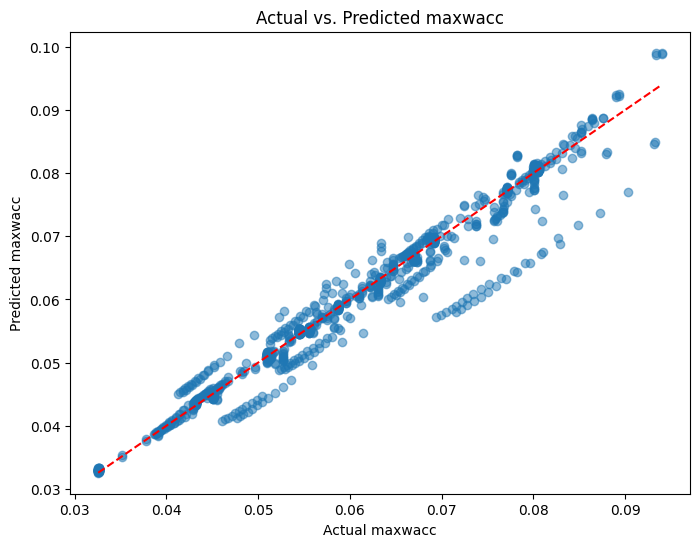

In [88]:
%pip install matplotlib
import matplotlib.pyplot as plt

# Plotting Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree reference line
plt.xlabel('Actual maxwacc')
plt.ylabel('Predicted maxwacc')
plt.title('Actual vs. Predicted maxwacc')
plt.show()


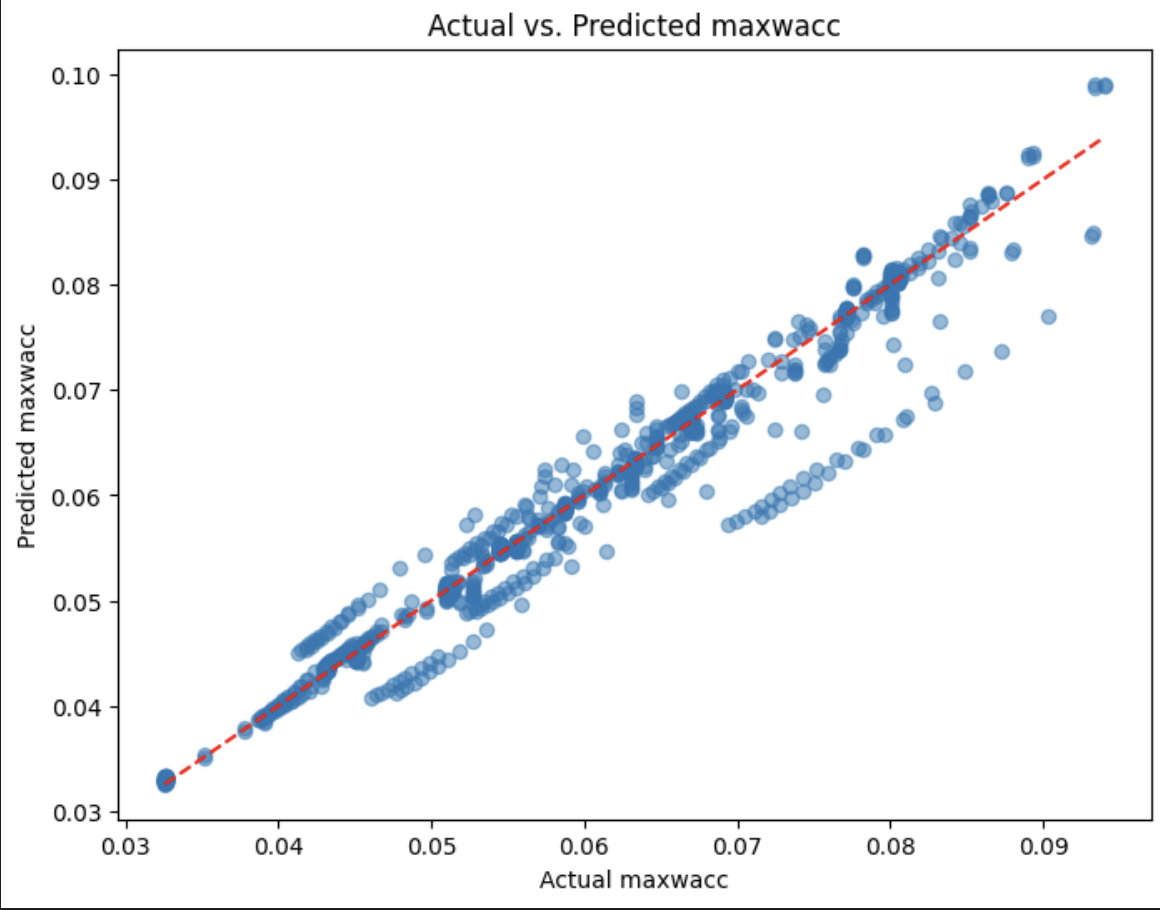

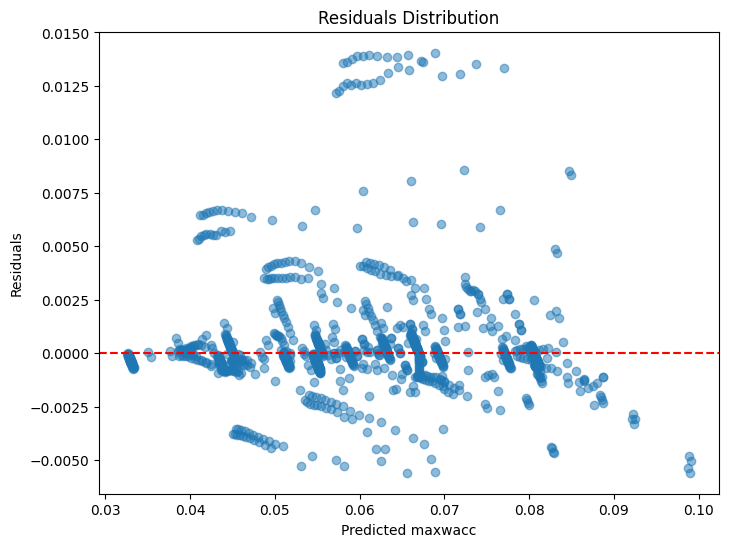

In [89]:
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Reference line at residual = 0
plt.xlabel('Predicted maxwacc')
plt.ylabel('Residuals')
plt.title('Residuals Distribution')
plt.show()


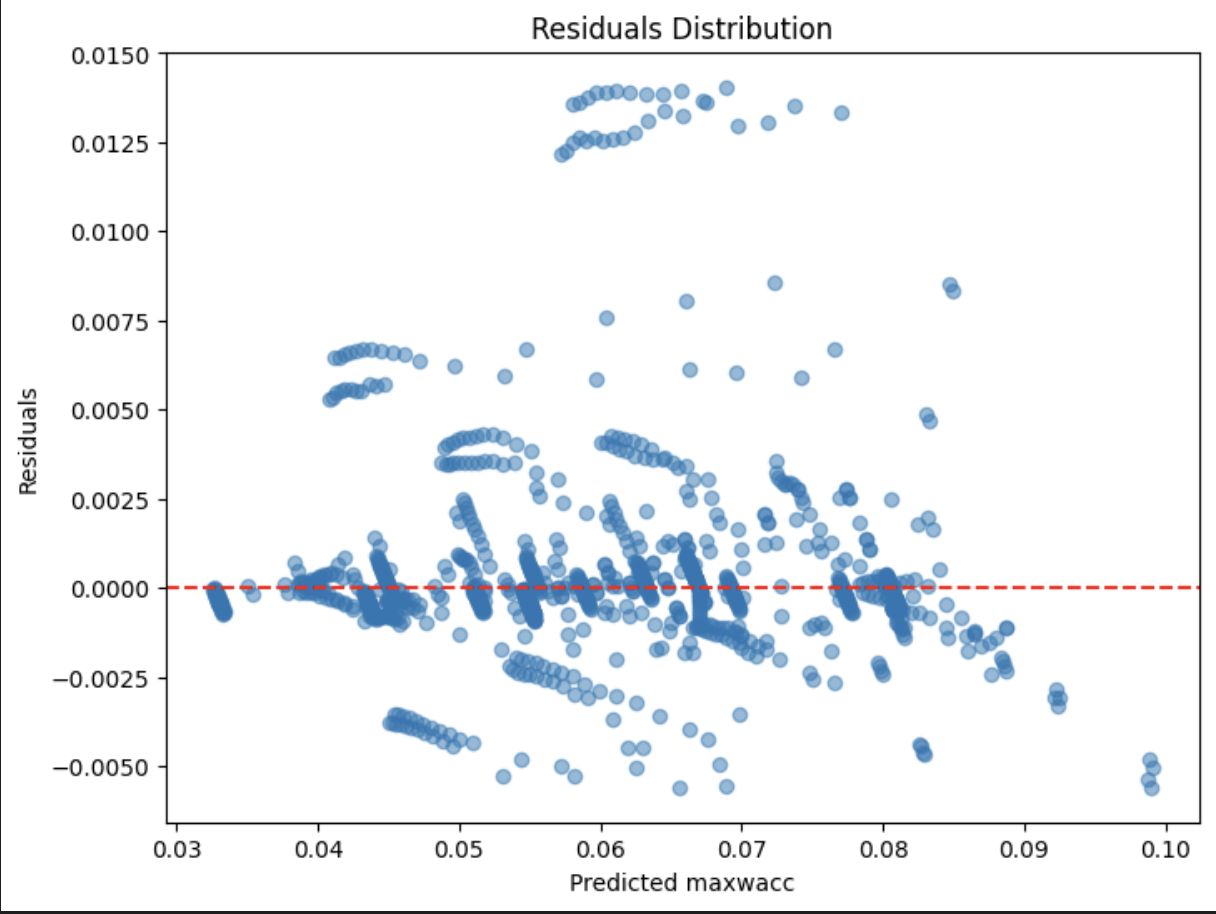

In order to visualize the impact of each feature on the cost of capital (maxwacc), we can draw a bar chart to show the regression coefficient of each feature. The larger the absolute value of the regression coefficient, the more significant the effect of the feature on the target variable. The positive value represents the positive impact, and the negative value represents the negative impact.

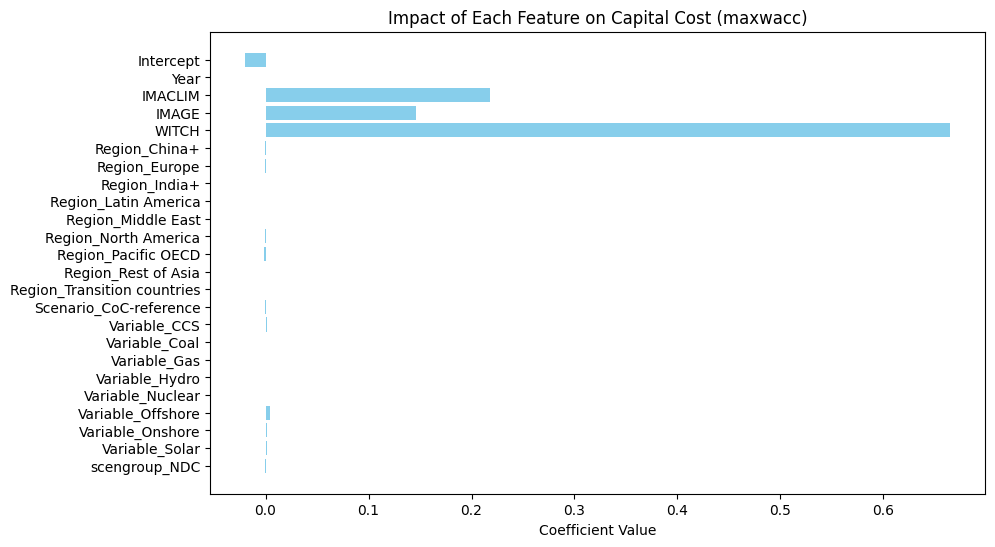

In [90]:
import matplotlib.pyplot as plt

# Extract feature names and coefficients
feature_names = ["Intercept"] + list(pd.get_dummies(data[features], columns=["Region", "Scenario", "Variable", "scengroup"], drop_first=True).columns)
coefficients = theta

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Impact of Each Feature on Capital Cost (maxwacc)')
plt.gca().invert_yaxis()  # Invert y-axis to have the intercept at the top
plt.show()



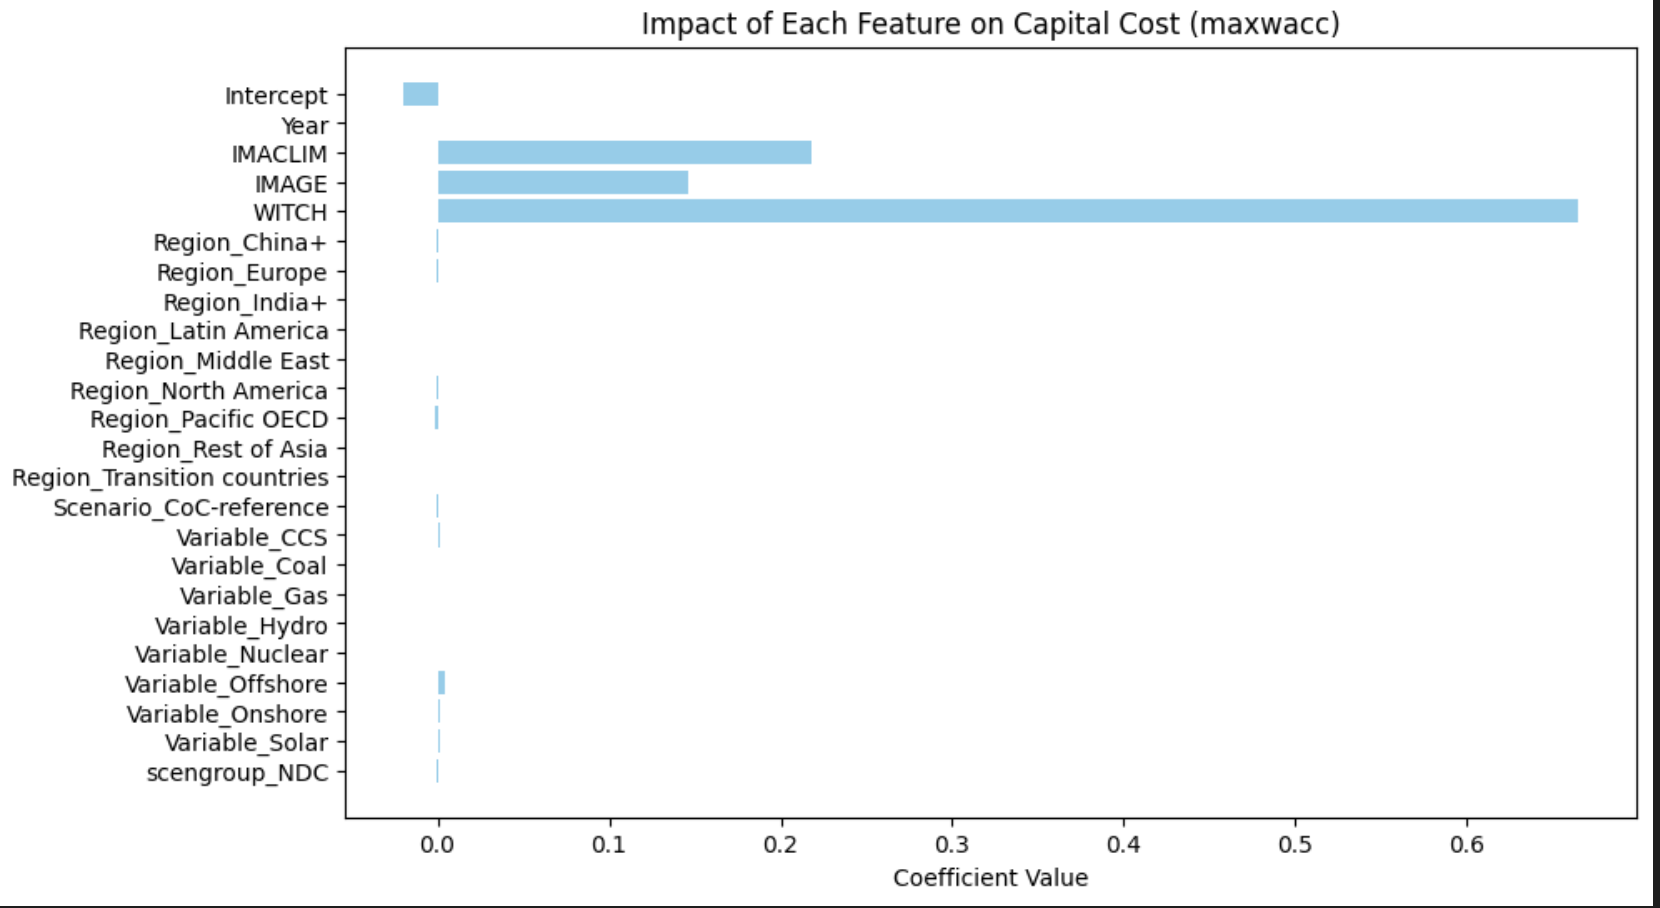